In [2]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle
#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/Design_MMI_LucasLobo/klayout')) #Current directory

In [6]:
mode = lumapi.MODE()

In [7]:
f=mode.gdsopen('MMIGDS.gds')
mode.gdsbegincell(f,'MMI')
#MMI
mode.gdsaddrect(f,1,90.5e-6,0,181e-6,10e-6) 
#GUIA ENTRADA
mode.gdsaddrect(f,1,-7e-6,4.24e-6,2e-6,0.45e-6)
mode.gdsaddrect(f,1,-7e-6,-4.24e-6,2e-6,0.45e-6)
#GUIA SAIDA EXTERNA
mode.gdsaddrect(f,1,188e-6,4.24e-6,2e-6,0.45e-6)
mode.gdsaddrect(f,1,188e-6,-4.24e-6,2e-6,0.45e-6)
#GUIA SAIDA INTERNA
mode.gdsaddrect(f,1,188e-6,0.76e-6,2e-6,0.45e-6)
mode.gdsaddrect(f,1,188e-6,-0.76e-6,2e-6,0.45e-6)
#TAPPER ENTRADA
mode.gdsaddpoly(f,1,np.array([[0,(0.75+4.24)*1e-6],[0,(-0.75+4.24)*1e-6],[-6e-6,(-0.225+4.24)*1e-6],[-6e-6,(0.225+4.24)*1e-6]]))
mode.gdsaddpoly(f,1,np.array([[0,(0.75-4.24)*1e-6],[0,(-0.75-4.24)*1e-6],[-6e-6,(-0.225-4.24)*1e-6],[-6e-6,(0.225-4.24)*1e-6]]))
#TAPPER SAIDA EXTERNA
mode.gdsaddpoly(f,1,np.array([[181e-6,(0.75+4.24)*1e-6],[181e-6,(-0.75+4.24)*1e-6],[187e-6,(-0.225+4.24)*1e-6],[187e-6,(0.225+4.24)*1e-6]]))
mode.gdsaddpoly(f,1,np.array([[181e-6,(0.75-4.24)*1e-6],[181e-6,(-0.75-4.24)*1e-6],[187e-6,(-0.225-4.24)*1e-6],[187e-6,(0.225-4.24)*1e-6]]))
#TAPPER SAIDA INTERNA
mode.gdsaddpoly(f,1,np.array([[181e-6,(0.75+0.76)*1e-6],[181e-6,(-0.75+0.76)*1e-6],[187e-6,(-0.225+0.76)*1e-6],[187e-6,(0.225+0.76)*1e-6]]))
mode.gdsaddpoly(f,1,np.array([[181e-6,(0.75-0.76)*1e-6],[181e-6,(-0.75-0.76)*1e-6],[187e-6,(-0.225-0.76)*1e-6],[187e-6,(0.225-0.76)*1e-6]]))

mode.gdsendcell(f)
mode.gdsclose(f)

In [5]:
inter = lumapi.INTERCONNECT(filename='chip.icp')


In [17]:
resultados1 = inter.getresult('ONA_1','input 1/mode 1/gain')
resultados2 = inter.getresult('ONA_1','input 2/mode 1/gain')
resultados3 = inter.getresult('ONA_1','input 3/mode 1/gain')
resultados4 = inter.getresult('ONA_1','input 4/mode 1/gain')

dict_keys(['wavelength', 'frequency', 'TE gain (dB)', 'Lumerical_dataset'])


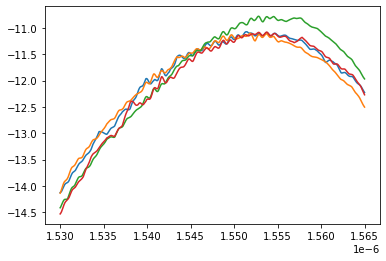

In [20]:
print(resultados.keys())
plt.plot(resultados1['wavelength'],resultados1['TE gain (dB)'])
plt.plot(resultados2['wavelength'],resultados2['TE gain (dB)'])
plt.plot(resultados3['wavelength'],resultados3['TE gain (dB)'])
plt.plot(resultados4['wavelength'],resultados4['TE gain (dB)'])